## Import and libraries setup

In [ ]:
!pip install python-crfsuite
!pip install sklearn-pycrfsuite

     |████████████████████████████████| 743 kB 5.4 MB/s 
     |████████████████████████████████| 485 kB 7.8 MB/s 
  Created wheel for sklearn-pycrfsuite: filename=sklearn_pycrfsuite-0.4.0-py2.py3-none-any.whl size=11001 sha256=46c5408950bbde1bcf324d0da961e2637a157eb03a3a43fa4437618f0b2a4f0a
  Stored in directory: /root/.cache/pip/wheels/44/50/b1/295e502c6652f551dc99bfdb394a3fe2fcb47668e333391f38
  Created wheel for python-crfsuite-extension: filename=python_crfsuite_extension-0.9.7-cp37-cp37m-linux_x86_64.whl size=775540 sha256=11c6bfeba819073edf06bcbcbb60e8d8d45b8445c6285d3a979fc21ad5f97865
  Stored in directory: /root/.cache/pip/wheels/70/d7/bf/369f4d179407dbf3840132e4135fa61f0bf711f4496d0bf750
Successfully built sklearn-pycrfsuite python-crfsuite-extension


In [ ]:
import pandas as pd
import nltk,dill,pycrfsuite,time
from tqdm import tqdm
import matplotlib.pyplot as plt

nltk.download('treebank')

[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Package treebank is already up-to-date!


True

In [ ]:
train_data = nltk.corpus.treebank.tagged_sents()
test_data = nltk.corpus.treebank.tagged_sents()[3001:]

# Models definition


In [ ]:
def HMM_model(tmp_data,test_data): 
  #instantiate: 
  HMM_Trainer = nltk.tag.hmm.HiddenMarkovModelTrainer()
  HMM = HMM_Trainer.train_supervised(tmp_data)
  HMM_Eval = round(HMM.evaluate(test_data), 3)
  with open('HMM_Treebank_POS_Tagger', 'wb') as f: 
    dill.dump(HMM,f)

  return HMM_Eval

def TnT_model(tmp_data,test_data):
  TnT_Trainer = nltk.tag.tnt.TnT()
  TnT_Trainer.train(tmp_data)
  TnT_Eval = round(TnT_Trainer.evaluate(test_data), 3)
  with open('TnT_Treebank_POS_Tagger', 'wb') as f: 
    dill.dump(TnT_Trainer,f)
  return TnT_Eval

def PER_model(tmp_data, test_data):
  PER_Trainer = nltk.tag.perceptron.PerceptronTagger(load=False)
  PER_Trainer.train(tmp_data)
  PER_Eval = round(PER_Trainer.evaluate(test_data), 3)
  with open('PER_Treebank_POS_Tagger', 'wb') as f: 
    dill.dump(PER_Trainer,f)
  return PER_Eval

def CRF_model(tmp_data, test_data):
  CRF_Trainer = nltk.tag.CRFTagger() 
  CRF_Trainer.train(tmp_data,'crf_tagger_model')
  CRF_Eval = round(CRF_Trainer.evaluate(test_data), 3)
  return CRF_Eval

# Train & Test samples

In [ ]:
def test_all_models(train_data, test_data): 
  
  len_sentences = [500,1000,1500,2000,2500,3000]
  rt = []
  l = []
  for x in tqdm(len_sentences): 

    tmp_data = train_data[:x]

    print(f"\n Training all the models with {x} samples")
    
    tic = time.time()
    model_accs = {
                  "HMM":HMM_model(tmp_data,test_data),
                  "TnT":TnT_model(tmp_data,test_data),
                  "PER":PER_model(tmp_data,test_data),
                  "CRF":CRF_model(tmp_data,test_data)
              }
    toc = time.time()
    run_time = toc-tic
    rt.append(run_time)
    print(f'\n Trained the first batch of models with {x} samples in {run_time:.2f} seconds')
    l.append(model_accs)
    

  return l,rt

In [ ]:
# running the models 
model_acc_list,run_time = test_all_models(train_data, test_data)

  0%|          | 0/6 [00:00<?, ?it/s]


 Training all the models with 500 samples


 17%|█▋        | 1/6 [00:38<03:11, 38.26s/it]


 Trained the first batch of models with 500 samples in 38.26 seconds

 Training all the models with 1000 samples


 33%|███▎      | 2/6 [01:54<04:01, 60.35s/it]


 Trained the first batch of models with 1000 samples in 75.81 seconds

 Training all the models with 1500 samples


 50%|█████     | 3/6 [03:47<04:14, 84.79s/it]


 Trained the first batch of models with 1500 samples in 113.71 seconds

 Training all the models with 2000 samples


 67%|██████▋   | 4/6 [06:19<03:42, 111.14s/it]


 Trained the first batch of models with 2000 samples in 151.37 seconds

 Training all the models with 2500 samples


 83%|████████▎ | 5/6 [09:11<02:13, 133.13s/it]


 Trained the first batch of models with 2500 samples in 171.95 seconds

 Training all the models with 3000 samples


100%|██████████| 6/6 [12:20<00:00, 123.42s/it]


 Trained the first batch of models with 3000 samples in 188.73 seconds


# Post-processing



In [ ]:
df = pd.DataFrame.from_dict(model_acc_list)
#convert to percentages 
df = df * 100

In [ ]:
df['Training_Samples'] = [500,1000,1500,2000,2500,3000]
df = df.set_index('Training_Samples')
df

,HMM,TnT,PER,CRF
Training_Samples,,,,
500,17.3,74.7,91.3,91.0
1000,22.1,79.6,93.3,92.5
1500,26.2,82.8,94.2,93.3
2000,30.4,84.9,94.9,93.9
2500,33.5,86.2,95.4,94.3
3000,36.9,87.6,95.9,94.8


# Plots

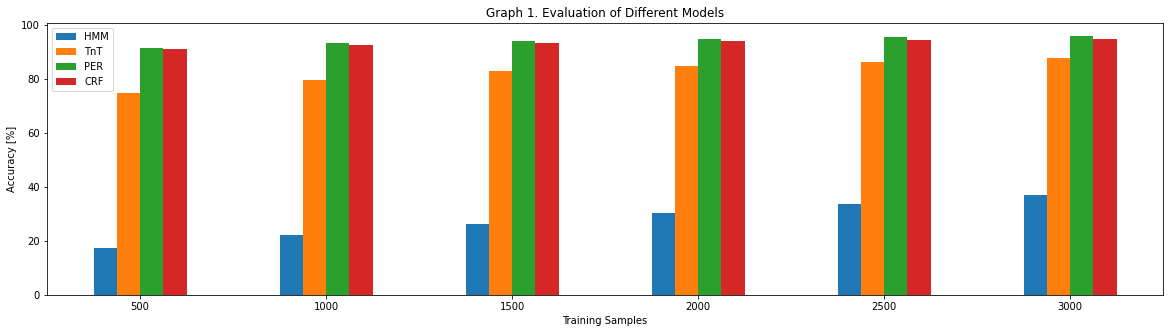

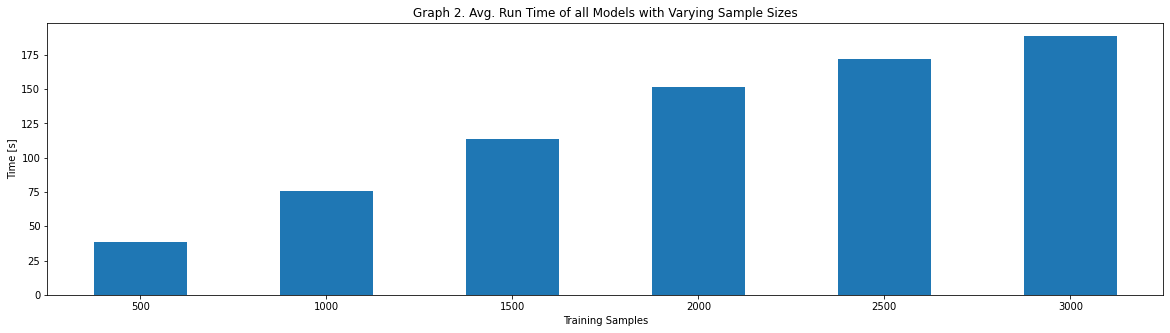

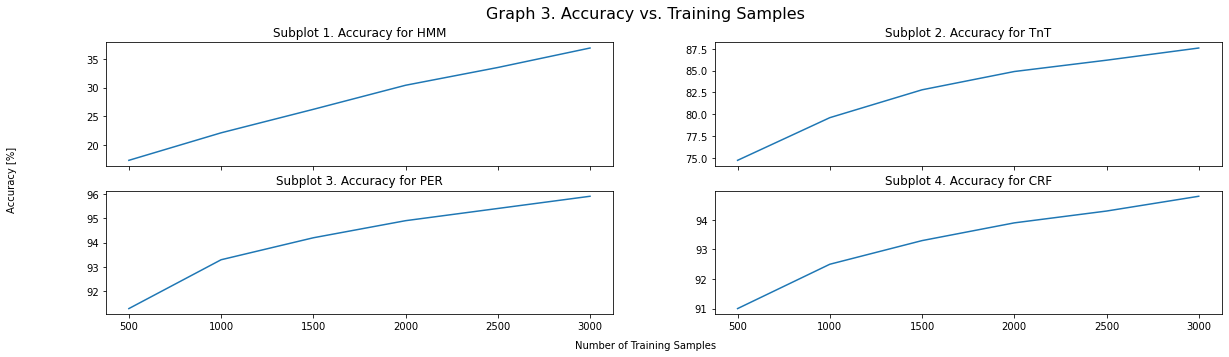

In [ ]:
FIG_SIZE = (20,5)

#plotting accuracy for each model and sample sizes 
df[cols].plot(kind='bar',
        title='Graph 1. Evaluation of Different Models',
        xlabel='Training Samples',
        ylabel='Accuracy [%]',
        figsize=FIG_SIZE,
        rot=0)
#plt.savefig('Evaluation of Different Models.png')
plt.show()

#plotting time taken

df['run_time'] = run_time
df['run_time'].plot(kind='bar',
          title='Graph 2. Avg. Run Time of all Models with Varying Sample Sizes',
          xlabel='Training Samples',
          ylabel='Time [s]',
          figsize=FIG_SIZE,
          rot=0)
#plt.savefig('Avg. Run Time of all Models with Varying Sample Sizes.png')
plt.show()

# one zipped list of coordinates and column titles
cols = ['HMM', 'TnT', 'PER', 'CRF']
coords = [(0,0),(0,1),(1,0),(1,1)]
all = list(zip(coords, cols))
# setting up the figure 
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=FIG_SIZE,sharex=True)
# Setting the main title
fig.suptitle("Graph 3. Accuracy vs. Training Samples", fontsize=16)
#shared x_label
fig.text(0.5, 0.04, 'Number of Training Samples', ha='center', va='center')
# shared y_label
fig.text(0.06, 0.5, 'Accuracy [%]', ha='center', va='center', rotation='vertical')

for idx,x in enumerate(all): 
  ax[x[0][0],x[0][1]].plot(df[x[1]])
  ax[x[0][0],x[0][1]].title.set_text(f'Subplot {idx+1}. Accuracy for {x[1]}')

#plt.savefig('Accuracy_vs_training_samples.png')
plt.show()


In [ ]:
df.describe()

,HMM,TnT,PER,CRF,run_time
count,6.000000,6.000000,6.000000,6.000000,6.000000
mean,27.733333,82.633333,94.166667,93.300000,123.304214
std,7.312090,4.789433,1.675311,1.381304,58.336085
min,17.300000,74.700000,91.300000,91.000000,38.256189
25%,23.125000,80.400000,93.525000,92.700000,85.286180
50%,28.300000,83.850000,94.550000,93.600000,132.537152
75%,32.725000,85.875000,95.275000,94.200000,166.804959
max,36.900000,87.600000,95.900000,94.800000,188.731377


# Report 

## Description

During this excercise we used the 'treebank' corpus in combination with different POS tagging models. Each of the model was trained with a varying size of training samples from the same corpus. 

The models are as follows: 

Name | Description
--|--
HMM: Hidden Markov Model| It is an extension of Markov chains, stating that the probability of transition from one state to another only depends on the current state.This means the transitions previous to this one are not taken into account.
TnT: A Statisical Part of Speech Tagger|It a statistical tagger that works on second order Markov chains. This means, the previous state is taken into account to calculate the probability of transition.
perceptron| Port of Textblob Averaged Perceptron Tagger which uses a structured perceptron algorithm 
CRFSuite: Conditional Random Fields|

With the corresponding training sample sizes which were 500, 1000, 1500, 2000, 2500, and 3000.

What we did was to define a function to train each model and save its parameters, which we then passed to our _test_all_models_ function. This allowed us to store the results of each model with each training sample size to a dictionary for easier post-processing. 

## Evaluation

Upon evaluation of the different models used, observed graphically in *Graph 1*, we can see that _HMM_ has the lowest accuracy of them all, with a maximum accuracy of ~37%. This is very low compared to the minimum accuracy of _TnT_ being ~75%. Particularly, for _HMM_ the accuracy slowly increased with the increasing number of training samples. We observed that the other models performed much better with increasing training samples, and they did not plateu at any point. 

We also observed in *Graph 2*, the increasing time taken to train each model with the number of samples. It is increasing constantly which means that there needs to be some modifications if the training sample get too large, since it would not be viable to train them with such a large training time. One option here would be to alter the source files of the models to see if a numba JIT, can be used (allowing for just in time compilation), if this is not viable, I would search for a way to use the GPU to perform the calculations. 

## Conclusion

In conclusion, comparing all four models with the varying training samples, we would choose to keep the _PER_ model as it has the highest accuracy of all four. The accuracy ~96% is satisfying when compared to the other models. We can see this comparisson graphically in *Graph 3*, where we plotted a graph of 4-subplots in order to have an easier overview. We see that _Subplot 3_ has the highest accuracy of them all. 

